# Tarea 5- Estadística Aplicada
## Alejandro Hernández Cerda 1903855
### gpo 041

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from lifelines import KaplanMeierFitter, ExponentialFitter, CoxPHFitter, WeibullFitter
from lifelines.statistics import logrank_test

### Inciso a)

In [5]:
df=pd.read_excel('supervivencia_examenes.xlsx')
df

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f
5,6,103,1,98.0,m
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f


In [6]:
#Hacemos el df de hombres
df_hombres = df[df['género']=='m']
df_hombres

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
5,6,103,1,98.0,m
10,11,87,1,88.0,m
12,13,112,1,84.0,m
13,14,111,1,82.0,m
15,16,116,1,74.0,m
16,17,119,1,72.0,m


In [7]:
Tiempo_p_hombres = df_hombres.iloc[:,1].mean()
Promedio_hombres = df_hombres.iloc[:,3].mean()
print(f'Los hombres tuvieron un tiempo promedio de: {round(Tiempo_p_hombres,4)} minutos al contestar el examen\nY un promedio de calificacion de: {round(Promedio_hombres,4)}') 

Los hombres tuvieron un tiempo promedio de: 106.6667 minutos al contestar el examen
Y un promedio de calificacion de: 88.6667


In [8]:
#Hacemos el df de mujeres
df_mujeres = df[df['género']=='f']
df_mujeres 

,id,tiempo,examen,calificación,género
3,4,120,1,100.0,f
4,5,106,1,98.0,f
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f
11,12,99,1,86.0,f
14,15,90,1,78.0,f


In [9]:
Promedio_mujeres=df_mujeres.iloc[:,3].mean()
Tiempo_p_mujeres=df_mujeres.iloc[:,1].mean()
print(f'Las mujeres tuvieron un tiempo promedio de: {Tiempo_p_mujeres} minutos al contestar el examen\nY un promedio de calificacion de: {Promedio_mujeres}') 

Las mujeres tuvieron un tiempo promedio de: 108.125 minutos al contestar el examen
Y un promedio de calificacion de: 93.0


In [10]:
print('Por lo tanto las mujeres obtuvieron una calficacion mayor a la de los hombres\nAsi como tardaron en promedio mas tiempo contestando el examen')

Por lo tanto las mujeres obtuvieron una calficacion mayor a la de los hombres
Asi como tardaron en promedio mas tiempo contestando el examen


### inciso b) e Inciso c)

Al ser un examen, no existe riesgo a lo largo del tiempo, pues todos van a entregar el examen cuando el tiempo del mismo finalice. Por lo tanto se elige el modelo **EXPONENCIAL**

<AxesSubplot:>

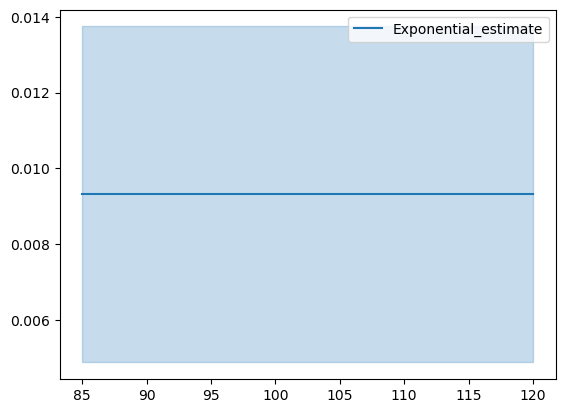

In [11]:
exp1 = ExponentialFitter().fit(df['tiempo'],df['examen'])
exp1.plot_hazard()

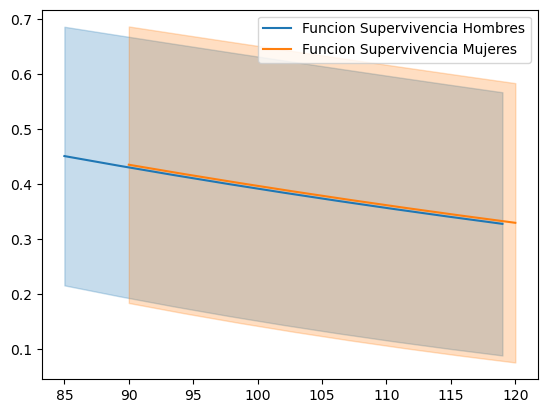

In [12]:
exp_mujeres=ExponentialFitter().fit(df_mujeres['tiempo'],df_mujeres['examen'])
exp_hombres=ExponentialFitter().fit(df_hombres['tiempo'],df_hombres['examen'])
exp_hombres.plot_survival_function(label='Funcion Supervivencia Hombres')
exp_mujeres.plot_survival_function(label='Funcion Supervivencia Mujeres')
plt.show()

Podemos ver, que la gráfica de la función de supervivencia de las mujeres está por encima de la de los hombres. Podemos afirmar que gráficamente, las mujeres tardan más en entregar el examen que los hombres

### Inciso d)

In [13]:
Kpm=KaplanMeierFitter().fit(df['tiempo'],df['examen'])
Kpm.survival_function_

,KM_estimate
timeline,
0.0,1.000000
85.0,0.941176
87.0,0.882353
90.0,0.823529
99.0,0.764706
103.0,0.705882
106.0,0.647059
108.0,0.529412
109.0,0.470588


In [14]:
Kpm.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
85.0,0.650179,0.991499
87.0,0.605979,0.969209
90.0,0.547132,0.939405
99.0,0.488278,0.904486
103.0,0.431478,0.865599
106.0,0.377147,0.823381
108.0,0.276168,0.730267
109.0,0.229598,0.679678
111.0,0.185759,0.626432


Text(0.5, 1.0, 'Modelo kaplan meier')

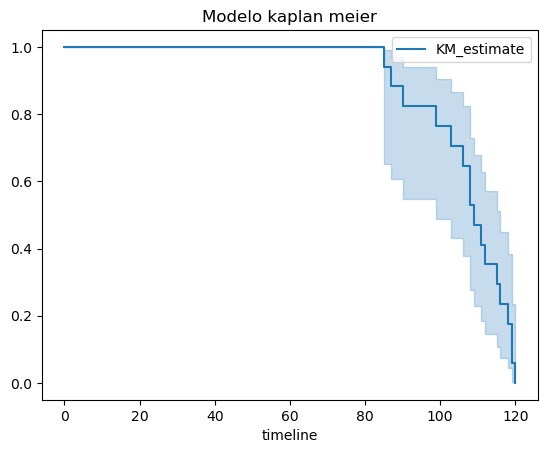

In [15]:
Kpm.plot_survival_function()
plt.title('Modelo kaplan meier')

### Inciso e) 

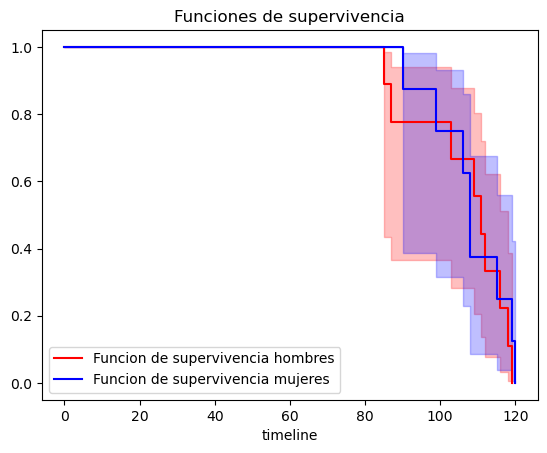

In [16]:
kpm_hombres=KaplanMeierFitter().fit(df_hombres['tiempo'],df_hombres['examen'])
kpm_mujeres=KaplanMeierFitter().fit(df_mujeres['tiempo'],df_mujeres['examen'])
kpm_hombres.plot_survival_function(label='Funcion de supervivencia hombres',color='red')
kpm_mujeres.plot_survival_function(label='Funcion de supervivencia mujeres',color='blue')
plt.title('Funciones de supervivencia')
plt.show()

In [17]:
#Intervalos de confianza de Hombres
kpm_hombres.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
85.0,0.432965,0.983564
87.0,0.364751,0.939296
103.0,0.281682,0.878307
109.0,0.204242,0.804525
111.0,0.135872,0.719315
112.0,0.078289,0.622627
116.0,0.033711,0.513068
118.0,0.006129,0.387665
119.0,0.000000,0.000000


In [18]:
#Intervalos de confianza de Mujeres
kpm_mujeres.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
90.0,0.387000,0.981393
99.0,0.314807,0.930898
106.0,0.229333,0.860698
108.0,0.087006,0.674363
115.0,0.037067,0.558084
119.0,0.006593,0.422706
120.0,0.000000,0.000000


### Inciso f)

$H_o:\ S_1=S_2$\
$H_a:\ S_1\neq S_2$\
Rechazamos Ho si p<$\alpha$

In [19]:
lrt1=logrank_test(df['tiempo'],df['examen'])
lrt1.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          33.00 <0.005     26.69

In [20]:
p_valor=lrt1.p_value
if(p_valor<.05):
  print('Como','{0:.10f}'.format(p_valor),'es menor a .05. Podemos decir que Ho se rechaza, por lo tanto las funciones de supervivencia son distintas')
else:
  print('Como','{0:.10f}'.format(p_valor),'es nayor a .05. Podemos decir que Ho no se rechaza, por lo tanto las funciones de supervivencia son iguales')

Como 0.0000000092 es menor a .05. Podemos decir que Ho se rechaza, por lo tanto las funciones de supervivencia son distintas


Al ser un p valor menor a $\alpha=.05$, podemos decir que rechazamos H0, por lo tanto, las pruebas y las funciones de supervivencia para ambos sexos son distintas.

### inciso g) e inciso h)

In [21]:
df
df_kaplan = df

In [22]:
df_kaplan['género'] = np.where(df['género']=='f',0,1)
df_kaplan

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,1
1,2,109,1,100.0,1
2,3,118,1,100.0,1
3,4,120,1,100.0,0
4,5,106,1,98.0,0
5,6,103,1,98.0,1
6,7,108,1,96.0,0
7,8,119,1,96.0,0
8,9,115,1,96.0,0
9,10,108,1,94.0,0


1. tiempo: Tiempo en minutos que tarda en contestar el examen
2. examen: 1 si la persona entregó el examen, 0 si no
3. calificación: calificación del 0 al 100 obtenida durante el examen
4. género: 1 si es masculino, 0 si es femenino

In [23]:
df_kaplan.groupby('género')['examen'].describe()

,count,mean,std,min,25%,50%,75%,max
género,,,,,,,,
0,8.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,9.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [24]:
cph=CoxPHFitter().fit(df_kaplan,'tiempo','examen')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2023-03-15 06:17:41 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
género         0.50       1.66       0.80            -1.07             2.08                 0.34                 7.99

               cmp to    z    p   -log2(p)
covariate                                 
id               0.00 0.42 0.67       0.57
calificación     0.00 0.47 0.64       0.64
género           0.00 0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

Podemos ver que el hecho de entregar casi de inmediato el examen si aumenta el riesgo de la calificación baja.\
Esto es = 1.06-1 = .06 . Quiere decir, que entre más tiempo tardemos es porque sabemos que estamos contestando, por lo mismo , nuestra calificación mejorará.\
El riesgo de obtener menor calificación al entregar el examen en poco tiempo es del 6%

En cuanto al coef del género, podemos asumir que, al ser masculino = 1, quiere decir que las personas que tuvieron menor calificación por haber tardado menos al contestar su examen fueron, en efecto, los hombres. Esto es debido a que también la media de calificación de ellos fue menor que la de las mujeres.
1.66-1=.66. Por lo tanto el riesgo de sacar menos calificación que las mujeres es de 66%

<AxesSubplot:xlabel='log(HR) (95% CI)'>

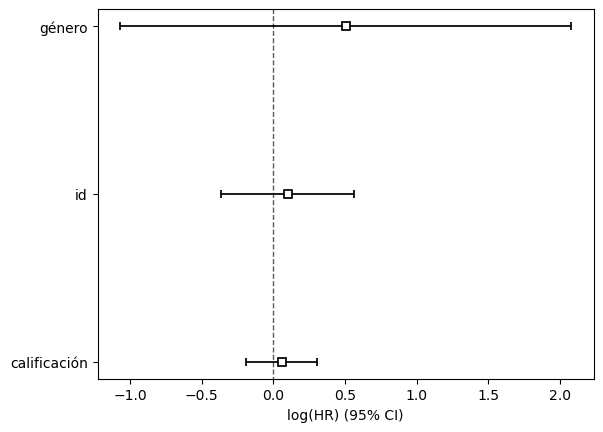

In [25]:
cph.plot()

### inciso i) e inciso j)

<AxesSubplot:>

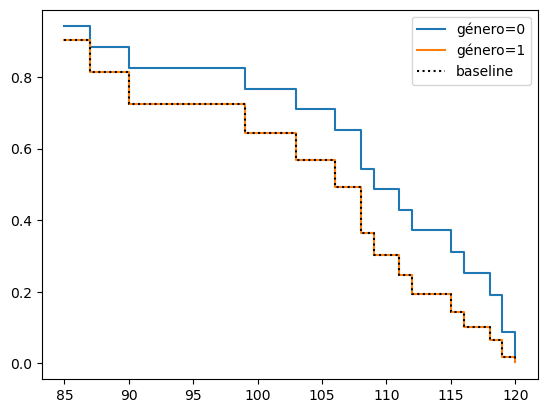

In [26]:
cph.plot_partial_effects_on_outcome(covariates='género',values=[0,1])

Como podemos ver, el gráfico generado con el modelod de Cox es demasiado parecido a el gráfico generado en el inciso C de este ejercicio. Podemos ver como la función de supervivencia de las mujeres está por encima de la de los hombres. Esto es que el modelo de Cox coincide con el modelo Kaplan-Meier

Volviendo a el modelo de Cox, podemos decir que las personas que más han tardado en la realización de el examen son las mujeres, coincidentemente, las mujeres son aquellas que sacaron mejor calificación que los hombres.

Entonces podemos decir, que el profesor se equivoca en decir que las alumnas responden en menor tiempo el examen pero confirma el punto suyo en el que dice que aquellos que tarden menos contestando el examen son los que obtienen menor calificación.
